<a href="https://colab.research.google.com/github/hariprasath790/bigdata-analytics/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("sales_dataset.csv")

df.head()


Saving sales_dataset.csv to sales_dataset (1).csv


,OrderID,Region,Product,Month,Quantity,Price,Sales,Profit
0,1,North,Laptop,Dec,5.0,2506,12530.0,1325.71
1,2,North,Camera,Feb,10.0,3956,39560.0,2292.33
2,3,North,Mobile,Apr,9.0,717,6453.0,1228.08
3,4,West,Mobile,Aug,10.0,2778,27780.0,42062.94
4,5,North,Mobile,Dec,7.0,3287,23009.0,2748.84


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OrderID   500 non-null    int64  
 1   Region    500 non-null    object 
 2   Product   500 non-null    object 
 3   Month     500 non-null    object 
 4   Quantity  485 non-null    float64
 5   Price     500 non-null    int64  
 6   Sales     485 non-null    float64
 7   Profit    485 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe()

,OrderID,Quantity,Price,Sales,Profit
count,500.000000,485.000000,500.000000,485.000000,485.000000
mean,250.500000,5.806186,2723.450000,16664.771134,2877.571464
std,144.481833,2.787139,1257.170966,19398.374908,3497.061444
min,1.000000,1.000000,509.000000,876.000000,65.610000
25%,125.750000,4.000000,1642.250000,7650.000000,1057.360000
50%,250.500000,6.000000,2678.000000,12532.000000,2087.930000
75%,375.250000,8.000000,3826.750000,21160.000000,3690.450000
max,500.000000,10.000000,4992.000000,299920.000000,44676.660000


In [ ]:
df.isnull().sum()

,0
OrderID,0
Region,0
Product,0
Month,0
Quantity,15
Price,0
Sales,15
Profit,15


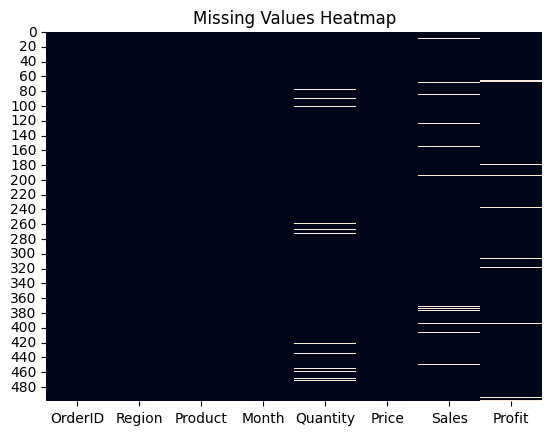

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Sales'].fillna(df['Sales'].mean(), inplace=True)
df['Profit'].fillna(df['Profit'].median(), inplace=True)

df.isnull().sum()

/tmp/ipython-input-1396967539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
/tmp/ipython-input-1396967539.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,0
OrderID,0
Region,0
Product,0
Month,0
Quantity,0
Price,0
Sales,0
Profit,0


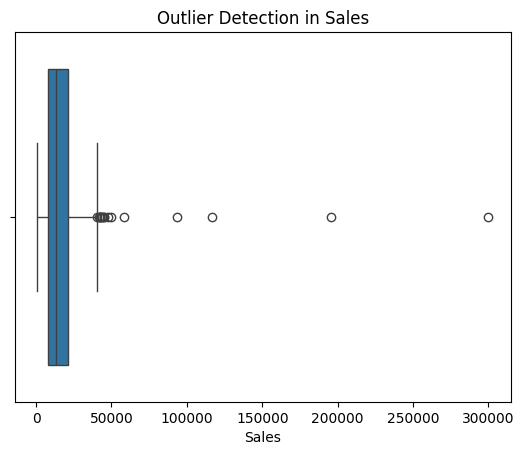

In [ ]:
sns.boxplot(x=df['Sales'])
plt.title("Outlier Detection in Sales")
plt.show()

In [ ]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Sales'] >= lower) & (df['Sales'] <= upper)]

df.shape


(484, 8)

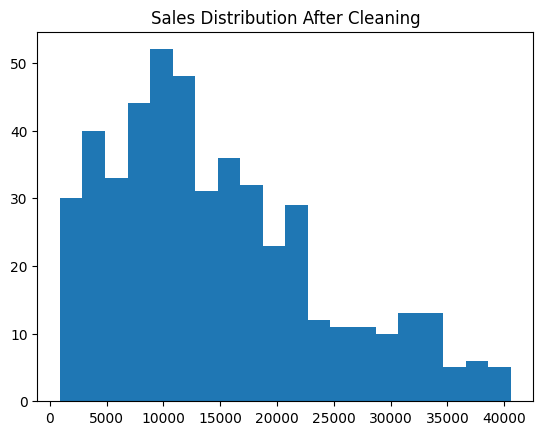

In [ ]:
plt.hist(df['Sales'], bins=20)
plt.title("Sales Distribution After Cleaning")
plt.show()

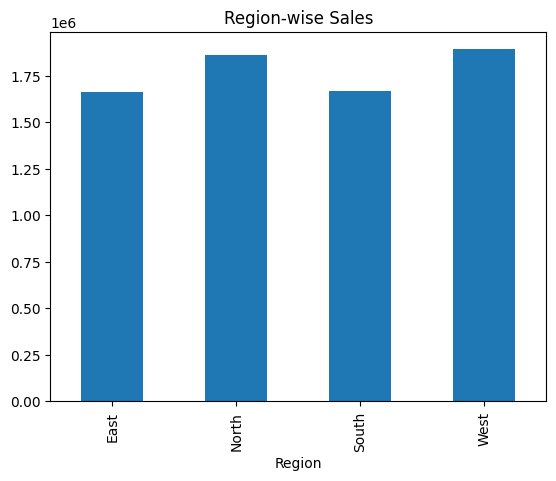

In [ ]:
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Region-wise Sales")
plt.show()

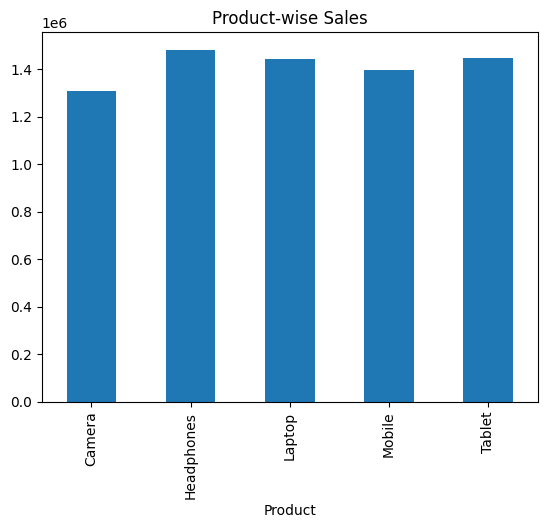

In [ ]:
df.groupby('Product')['Sales'].sum().plot(kind='bar')
plt.title("Product-wise Sales")
plt.show()


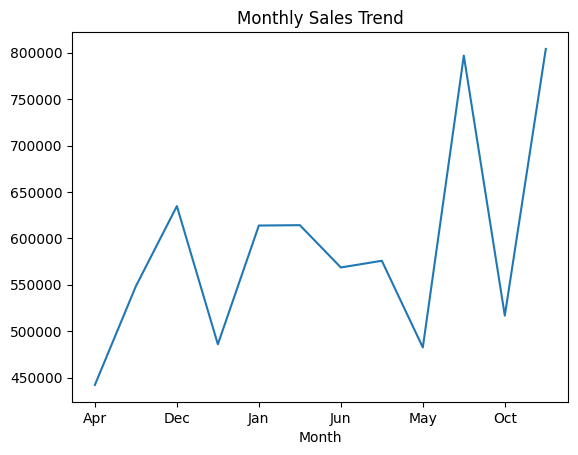

In [ ]:
df.groupby('Month')['Sales'].sum().plot(kind='line')
plt.title("Monthly Sales Trend")
plt.show()